In [1]:
%rm -rf ./* ./.*
!git clone https://github.com/Venus-Yim/Colab.git
%ls

rm: refusing to remove '.' or '..' directory: skipping './.'
rm: refusing to remove '.' or '..' directory: skipping './..'
Cloning into 'Colab'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 174 (delta 51), reused 23 (delta 23), pack-reused 111 (from 1)
Receiving objects: 100% (174/174), 943.14 KiB | 10.14 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Colab/


In [ ]:
%cp Colab/gauss_quadrature_mp.py .
for j in range(2,3):
  n_values = []

  for i in range(1, 9):
    n = int(6 * pow(10, i))
    n_values.append(n)

  n_values.sort()
  for n in n_values:
    %run gauss_quadrature_mp.py {n} {j}

In [2]:
%cp Colab/midpoint_rule.py .
for i in range(1,7):
  n=int(pow(3,i))
  %run midpoint_rule.py {2*n}
for i in range(3, 8):
    n = int(6 * pow(10, i))
    %run midpoint_rule.py {n}

%cp Colab/trapezoidal_rule.py .
for i in range(1,7):
  n=int(pow(3,i))
  %run trapezoidal_rule.py {2*n}
for i in range(3, 8):
    n = int(6 * pow(10, i))
    %run trapezoidal_rule.py {n}

%cp Colab/simpson_1_3_rule.py .
for i in range(1,7):
  n=int(pow(3,i))
  %run simpson_1_3_rule.py {2*n}
for i in range(3, 8):
    n = int(6 * pow(10, i))
    %run simpson_1_3_rule.py {n}

%cp Colab/simpson_3_8_rule.py .
for i in range(1,7):
  n=int(pow(3,i))
  %run simpson_3_8_rule.py {2*n}
for i in range(3, 8):
    n = int(6 * pow(10, i))
    %run simpson_3_8_rule.py {n}

%cp Colab/gauss_quadrature.py .
for j in range(2,6):
  n_values = []

  for i in range(1, 7):
    n = int(pow(3, i))
    n_values.append(2 * n)
  for i in range(3, 8):
    n = int(6 * pow(10, i))
    n_values.append(n)

  n_values.sort()
  for n in n_values:
    %run gauss_quadrature.py {n} {j}


%cp Colab/monte_carlo.py .
for i in range(1,7):
  n=int(pow(3,i))
  %run monte_carlo.py {2*n}
for i in range(3, 8):
    n = int(6 * pow(10, i))
    %run monte_carlo.py {n}

In [3]:
import pandas as pd

method_labels = [
    "Midpoint Rule",
    "Trapezoidal Rule",
    "Simpson 1/3 Rule",
    "Simpson 3/8 Rule",
    "Gauss Quadrature (2-point)",
    "Gauss Quadrature (3-point)",
    "Gauss Quadrature (4-point)",
    "Gauss Quadrature (5-point)",
    "Monte Carlo"
]

data_list = []
for i in range(1, 10):
    df = pd.read_csv(f'output{i}.csv', header=None, names=['n_samples', 'area', 'memory_required', 'elapsed_time', 'error'])
    data_list.append(df)


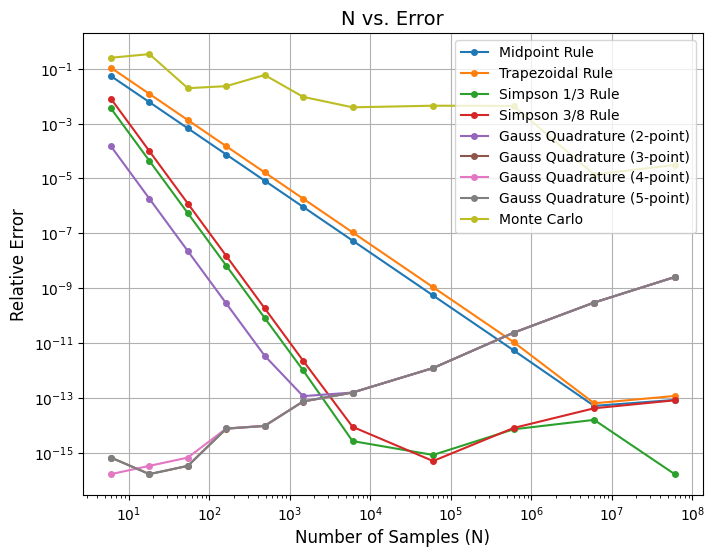

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for idx, (df, label) in enumerate(zip(data_list, method_labels), start=1):
    plt.loglog(df['n_samples'], df['error'], label=label, marker='o', markersize=4)

plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('Relative Error', fontsize=12)
plt.title('N vs. Error', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


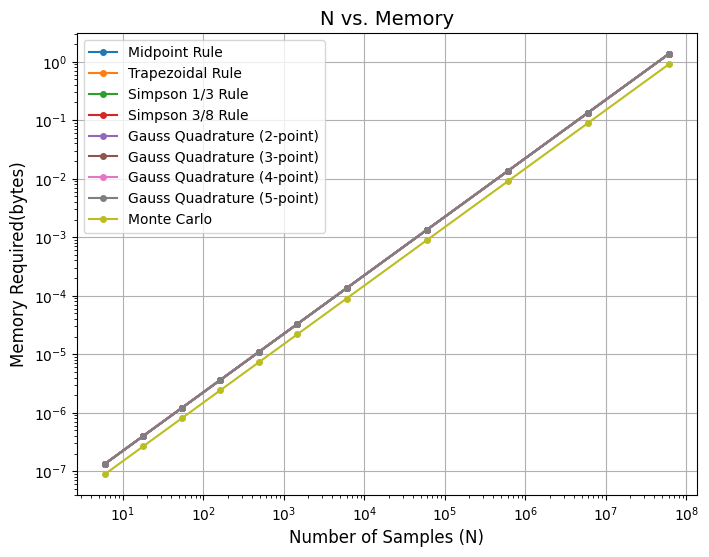

In [5]:
plt.figure(figsize=(8, 6))

for idx, (df, label) in enumerate(zip(data_list, method_labels), start=1):
    plt.loglog(df['n_samples'], df['memory_required'], label=label, marker='o', markersize=4)

plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('Memory Required(bytes)', fontsize=12)
plt.title('N vs. Memory', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()



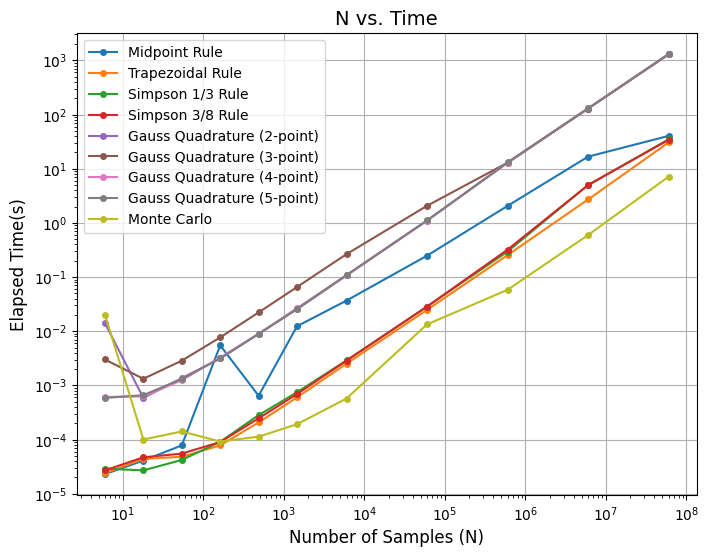

In [6]:
plt.figure(figsize=(8, 6))

for idx, (df, label) in enumerate(zip(data_list, method_labels), start=1):
    plt.loglog(df['n_samples'], df['elapsed_time'], label=label, marker='o', markersize=4)

plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('Elapsed Time(s)', fontsize=12)
plt.title('N vs. Time', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


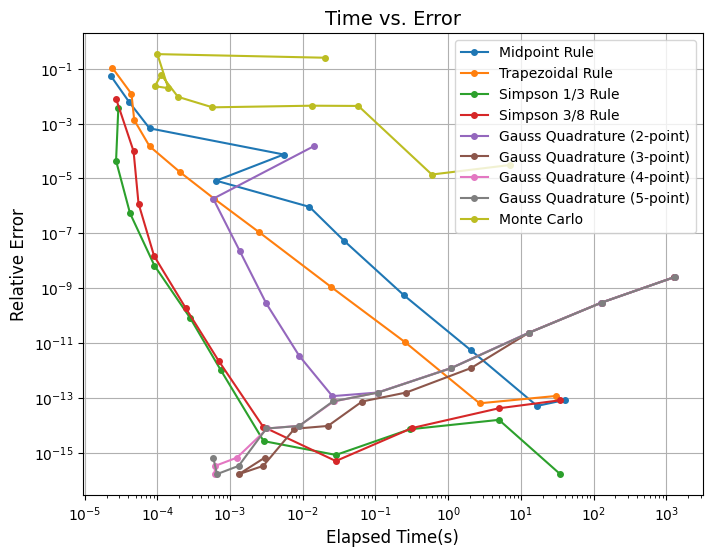

In [7]:
plt.figure(figsize=(8, 6))

for idx, (df, label) in enumerate(zip(data_list, method_labels), start=1):
    plt.loglog(df['elapsed_time'], df['error'], label=label, marker='o', markersize=4)

plt.xlabel('Elapsed Time(s)', fontsize=12)
plt.ylabel('Relative Error', fontsize=12)
plt.title('Time vs. Error', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [8]:
import glob
import shutil
from google.colab import drive

# 挂载 Google Drive
drive.mount('/content/drive')

# 匹配当前目录下所有 .csv 文件
csv_files = glob.glob("*.csv")

# 目标文件夹（你可以修改）
destination_folder = "/content/drive/MyDrive/ColabCSVs"

# 创建目标文件夹（如果不存在）
import os
os.makedirs(destination_folder, exist_ok=True)

# 拷贝所有 .csv 文件到 Google Drive
for file in csv_files:
    shutil.copy(file, destination_folder)
    print(f"Copied {file} to Drive.")


ValueError: mount failed

a. How much more accurate does the estimate of π become as N is increased? When N is increased by a factor of 10, does the error decrease by a factor of 10?

As N increases, the estimate of π becomes more and more accurate, particularly when N increases from 10² to 10⁷. The accuracy improves rapidly, but the error does not decrease linearly by a factor of 10 when N is increased by a factor of 10. Instead, the error decreases in a non-linear fashion, becoming smaller at a faster rate as N increases.

b. How does the amount of memory required scale as N is increased? Do you expect that it would be linear? How would the slope of the trendline in the log-log plot demonstrate that?

The memory required scales approximately linearly with N. This is because the program needs to store the sample points and related data as N increases. In the log-log plot, the slope of the trendline would be close to 1, indicating that the memory usage increases at a constant rate as the number of samples grows.

c. How does the amount of time to calculate scale as N is increased? Do you expect that it would be linear? How would the slope of the trendline in the log-log plot demonstrate that?

The time to calculate the estimate increases more and more rapidly as N is increased. This is likely due to the complexity of the Monte Carlo simulation, where the time taken grows faster as the number of samples increases. The slope of the trendline in the log-log plot would be greater than 1, indicating that the time complexity is sub-linear or super-linear, meaning it increases more steeply than a simple linear relationship.

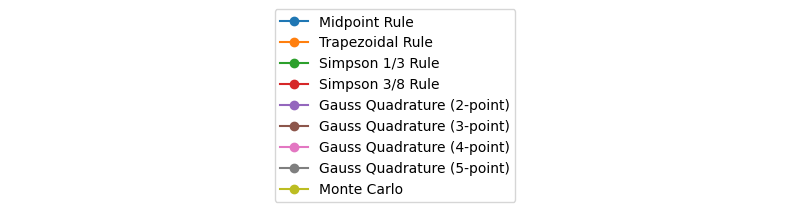

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 方法名称和对应颜色（可自定义）
method_labels = [
    "Midpoint Rule",
    "Trapezoidal Rule",
    "Simpson 1/3 Rule",
    "Simpson 3/8 Rule",
    "Gauss Quadrature (2-point)",
    "Gauss Quadrature (3-point)",
    "Gauss Quadrature (4-point)",
    "Gauss Quadrature (5-point)",
    "Monte Carlo"
]



# 创建一张空图只用于显示图例
plt.figure(figsize=(8, 2))
for label in zip(method_labels):
    plt.plot([], [], label=label,  marker='o', linestyle='-')

plt.legend(loc='center', ncol=1, fontsize=10)
plt.axis('off')  # 不显示坐标轴

plt.tight_layout()
plt.show()
